In [ ]:
#!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [5]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d harishvutukuri/dogs-vs-wolves

 92% 204M/222M [00:02<00:00, 77.4MB/s]
100% 222M/222M [00:02<00:00, 94.1MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

In [7]:
import pathlib
data_dir = tf.keras.utils.get_file('/content/gdrive/MyDrive/Kaggle/data', origin="/content/gdrive/MyDrive/Kaggle/data")
data_dir = pathlib.Path(data_dir)

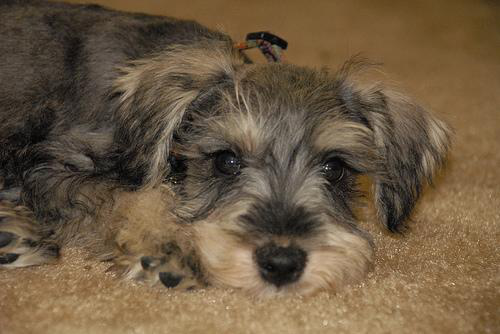

In [8]:
dogs = list(data_dir.glob('dogs/*'))
PIL.Image.open(str(dogs[100]))

In [48]:
batch_size = 32
img_height = 300
img_width = 300
epochs = 40
num_classes = 2

In [33]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=128,
    image_size=(img_height, img_width)
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=128,
    image_size=(img_height,img_width)
)
class_names = train_ds.class_names
print(class_names)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.
['dogs', 'wolves']


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
augmentation_layer = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal",
                                    input_shape=(img_height, img_width, 3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomRotation(0.2),
     layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

In [13]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [27]:
model = keras.Sequential(
    [
     augmentation_layer,
     normalization_layer,
     layers.Conv2D(16, 3, padding='same', activation='relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(32, 3, padding='same', activation='relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(64, 3, padding='same', activation='relu'),
     layers.MaxPooling2D(),
     layers.Dropout(0.1),
     layers.Flatten(),
     layers.Dense(128, activation='relu'),
     layers.Dense(num_classes)
    ]
)

In [49]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 300, 300, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)       

In [50]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/40
50/50 [==============================] - 13s 219ms/step - loss: 0.3902 - accuracy: 0.8291 - val_loss: 0.5519 - val_accuracy: 0.8100
Epoch 2/40
50/50 [==============================] - 12s 219ms/step - loss: 0.3544 - accuracy: 0.8559 - val_loss: 0.5713 - val_accuracy: 0.7875
Epoch 3/40
50/50 [==============================] - 12s 215ms/step - loss: 0.3786 - accuracy: 0.8296 - val_loss: 0.6578 - val_accuracy: 0.8100
Epoch 4/40
50/50 [==============================] - 12s 216ms/step - loss: 0.3442 - accuracy: 0.8555 - val_loss: 0.5804 - val_accuracy: 0.7950
Epoch 5/40
50/50 [==============================] - 12s 219ms/step - loss: 0.3648 - accuracy: 0.8532 - val_loss: 0.5962 - val_accuracy: 0.7875
Epoch 6/40
50/50 [==============================] - 12s 217ms/step - loss: 0.3364 - accuracy: 0.8583 - val_loss: 0.6504 - val_accuracy: 0.8150
Epoch 7/40
50/50 [==============================] - 12s 216ms/step - loss: 0.3428 - accuracy: 0.8577 - val_loss: 0.5661 - val_accuracy: 0.8125

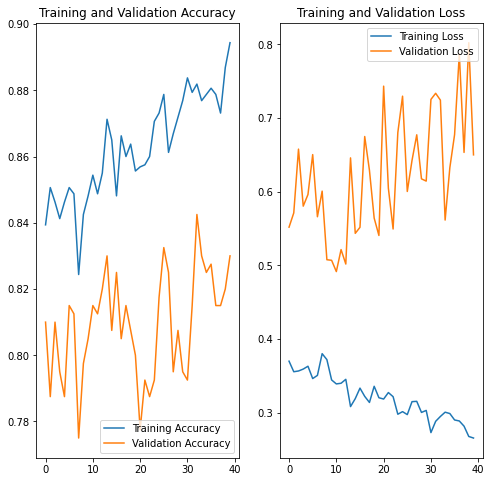

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [79]:
test_url = "https://dogzone-tcwebsites.netdna-ssl.com/wp-content/uploads/2018/07/siberian-husky-price.jpg"
test_path = tf.keras.utils.get_file('siberian-husky-price.jpg', origin=test_url)

img = keras.preprocessing.image.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Predocted: {} ... Accuracy: {:.2f}% ... Actual: Siberian Husky"
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

test_url = "https://ichef.bbci.co.uk/news/1024/cpsprodpb/2124/production/_106348480_mediaitem106348478.jpg"
test_path = tf.keras.utils.get_file('_106348480_mediaitem106348478.jpg', origin=test_url)

img = keras.preprocessing.image.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Predocted: {} ... Accuracy: {:.2f}% ... Actual: Rare Wolf"
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


Predocted: dogs ... Accuracy: 79.82% ... Actual: Siberian Husky
Predocted: wolves ... Accuracy: 86.45% ... Actual: Rare Wolf
